# Credit Risk Analysis 

In [1]:
import pandas as pd 
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams["figure.figsize"] = (13,7)

Data source: https://www.kaggle.com/datasets/laotse/credit-risk-dataset/

A brief description of the data:

- `person_age` $\rightarrow$  Age
- `person_income` $\rightarrow$ Annual Income
- `person_home_ownership` $\rightarrow$ Home ownership
- `person_emp_length` $\rightarrow$ Employment length (in years)
- `loan_intent` $\rightarrow$ Loan intent
- `loan_grade` $\rightarrow$ Loan grade
- `loan_amnt` $\rightarrow$ Loan amount
- `loan_int_rate` $\rightarrow$ Interest rate
- `loan_status` $\rightarrow$ Loan status (0 is non default 1 is default)
- `loan_percent_income` $\rightarrow$ Percent income
- `cb_person_default_on_file` $\rightarrow$ Historical default
- `cb_preson_cred_hist_length` $\rightarrow$ Credit history length

In [2]:
cr_loan = pd.read_csv('/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv')
cr_loan.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## EDA

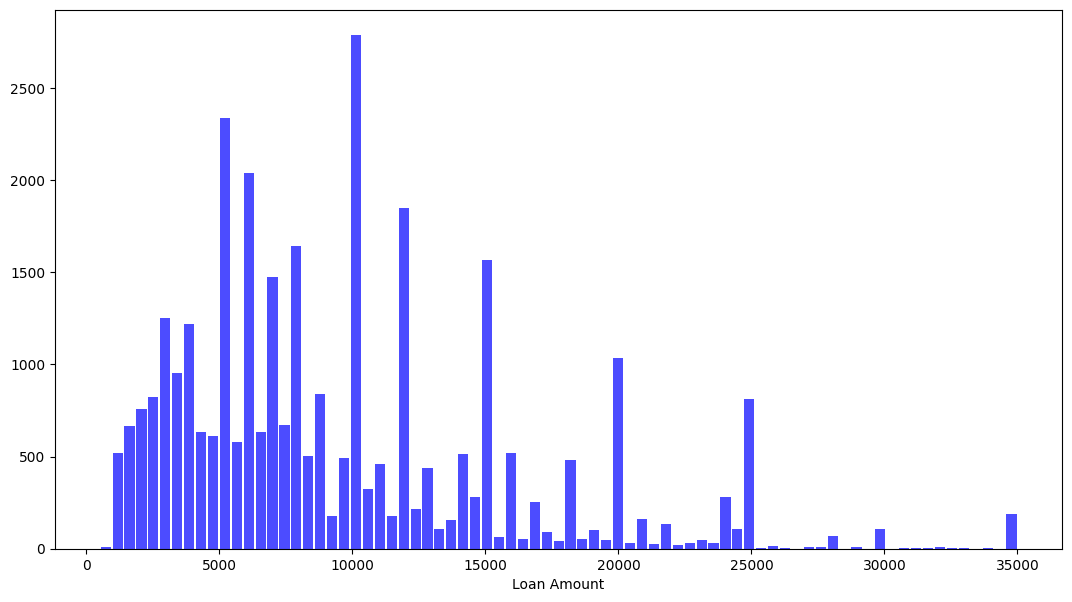

In [3]:
# Look at the distribution of loan amounts with a histogram
plt.hist(x=cr_loan['loan_amnt'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")
plt.show()

In [4]:
# Create a cross table of the loan intent and loan status
pd.crosstab(cr_loan['loan_intent'], cr_loan['loan_status'], margins = True)

loan_status,0,1,All
loan_intent,,,
DEBTCONSOLIDATION,3722,1490,5212
EDUCATION,5342,1111,6453
HOMEIMPROVEMENT,2664,941,3605
MEDICAL,4450,1621,6071
PERSONAL,4423,1098,5521
VENTURE,4872,847,5719
All,25473,7108,32581


In [5]:
# Create a cross table of home ownership, loan status, and grade
pd.crosstab(cr_loan['person_home_ownership'],[cr_loan['loan_status'],cr_loan['loan_grade']])

loan_status               0                                 1             \
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               5219  3729  1934  658  178  36  0  239   324  321   
OTHER                    23    29    11    9    2   0  0    3     5    6   
OWN                     860   770   464  264   26   7  0   66    34   31   
RENT                   3602  4222  2710  554  137  28  1  765  1338  981   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                     
MORTGAGE                553  161  61  31  
OTHER                    11    6   2   0  
OWN                      18   31   8   5  
RENT                   1559  423  99  27

In [6]:
cr_loan['person_home_ownership'].value_counts() 

person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

In [7]:
# Create a cross table of home ownership, loan status, and average percent income
pd.crosstab(cr_loan['person_home_ownership'], cr_loan['loan_status'],
              values=cr_loan['loan_percent_income'], aggfunc='mean')

loan_status,0,1
person_home_ownership,,
MORTGAGE,0.146504,0.184882
OTHER,0.143784,0.300000
OWN,0.180013,0.297358
RENT,0.144611,0.264859


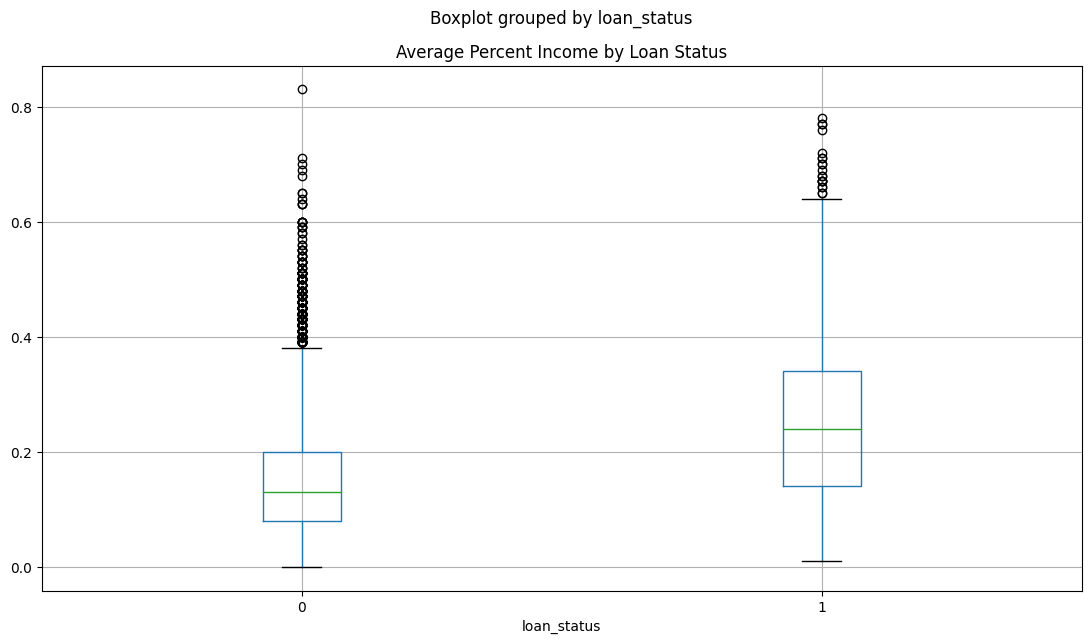

In [8]:
# Create a box plot of percentage income by loan status
cr_loan.boxplot(column = ['loan_percent_income'], by = 'loan_status')
plt.title('Average Percent Income by Loan Status')
plt.show()

It looks like the average percentage of income for defaults is higher. This could indicate those recipients have a debt-to-income ratio that's already too high.

In [9]:
# Create a cross table of percent income, loan status, and average interest rate of the loan
# Percent income has been grouped into four equal bins

pd.crosstab(pd.qcut(cr_loan['loan_percent_income'], 5), cr_loan['loan_status'],values=cr_loan['loan_int_rate'], aggfunc = 'mean')

loan_status,0,1
loan_percent_income,,
"(-0.001, 0.08]",10.152607,13.425089
"(0.08, 0.12]",10.240102,13.782163
"(0.12, 0.18]",10.426418,13.760557
"(0.18, 0.25]",10.762556,13.653932
"(0.25, 0.83]",10.905944,12.375971


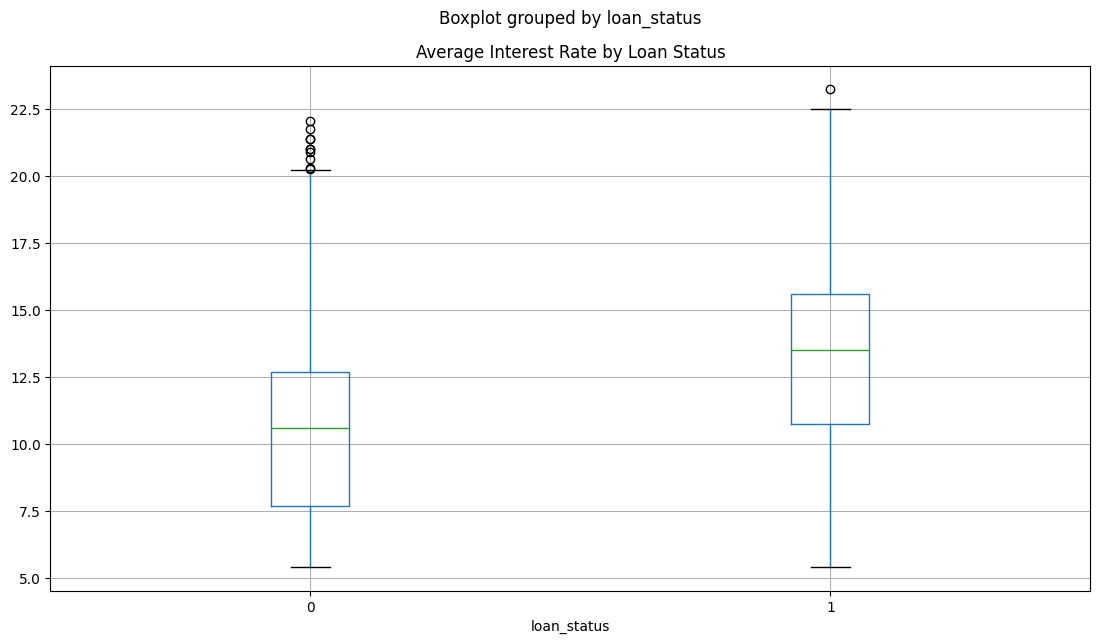

In [10]:
# Create a box plot of percentage income by loan status
cr_loan.boxplot(column = ['loan_int_rate'], by = 'loan_status')
plt.title('Average Interest Rate by Loan Status')
plt.show()

In [11]:
cr_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


<Axes: >

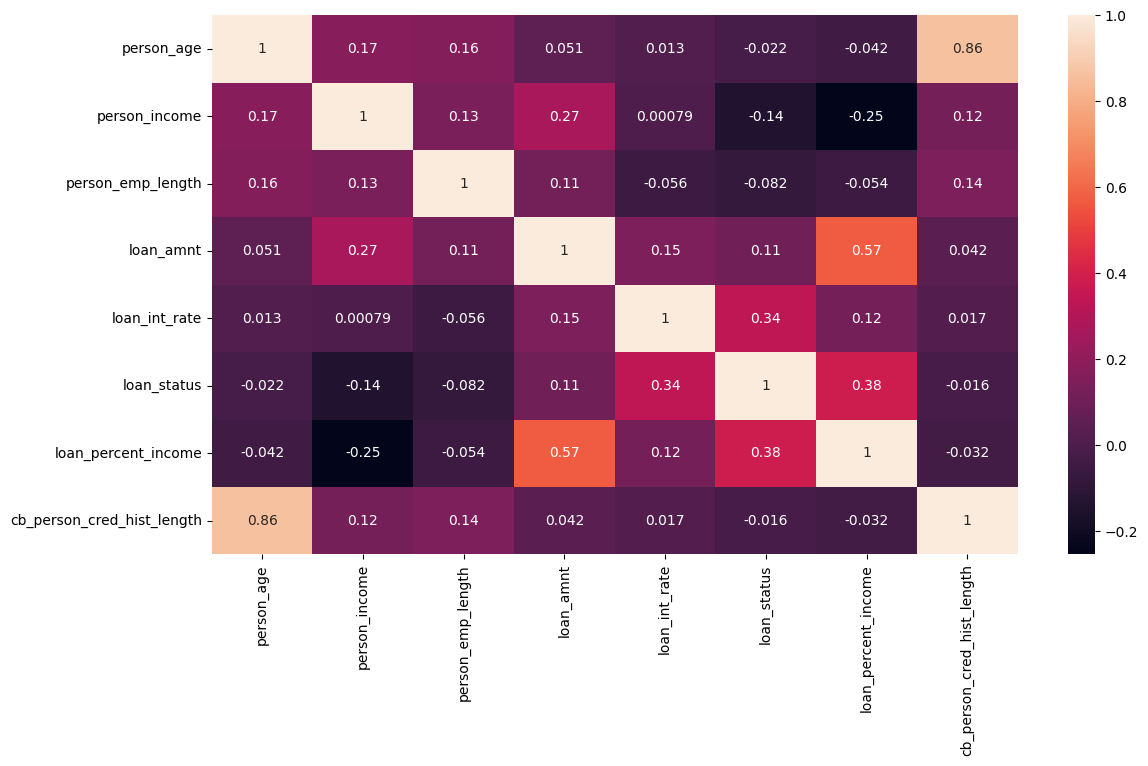

In [12]:
# Let's take a look of the correlations between the numerical features

sns.heatmap(cr_loan[['person_age', 'person_income', 'person_emp_length','loan_amnt','loan_int_rate','loan_status','loan_percent_income','cb_person_cred_hist_length']].corr(), annot=True)